In [1]:
import numpy as np
import cv2  as cv
import matplotlib.pyplot as plt

In [2]:
image = cv.imread('test_fixed.png')

In [8]:
histSize = [256]
range = [0, 256]


def plot_rgb_hist(image, histSize, range):
    histSize = [256]
    range = [0, 256]
    for i, col in enumerate(['b', 'g', 'r']):
        hist = cv.calcHist([image], [i], None, histSize, range)
        plt.plot(hist, color=col)
        plt.xlim(range)

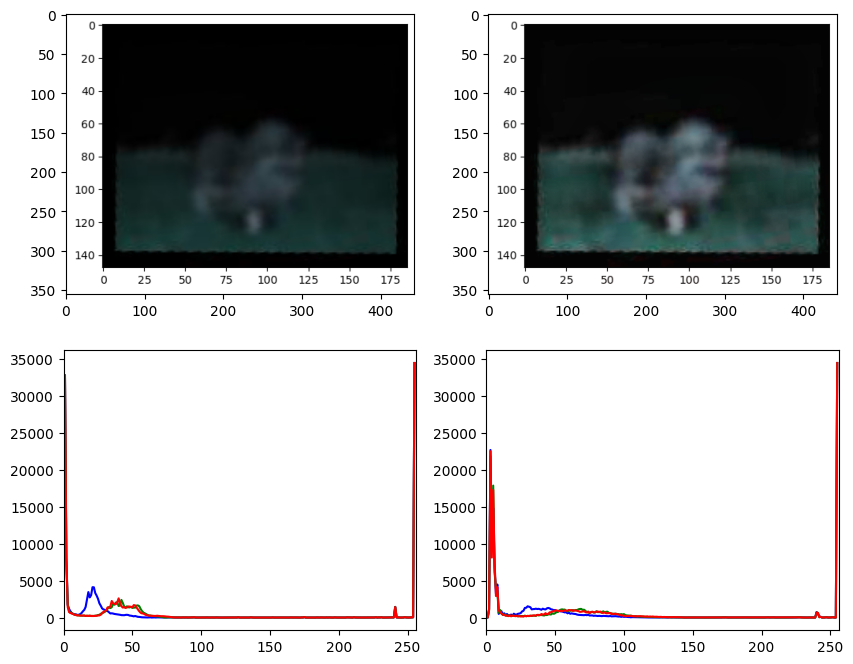

In [9]:
image
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

rgb_result_image = np.empty(np.shape(image), np.uint8)
rgb_result_image[:, :, 1] = clahe.apply(image[:, :, 1])
rgb_result_image[:, :, 2] = clahe.apply(image[:, :, 2])
rgb_result_image[:, :, 0] =clahe.apply(image[:, :, 0])


gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(image)
plt.subplot(gs[1])
plt.imshow(rgb_result_image)
plt.subplot(gs[2])
plot_rgb_hist(image, histSize, range)
plt.subplot(gs[3])
plot_rgb_hist(rgb_result_image, histSize, range)

cv.imwrite("rgb_result_image.jpg", rgb_result_image)
plt.show()

# Улучшение изображения

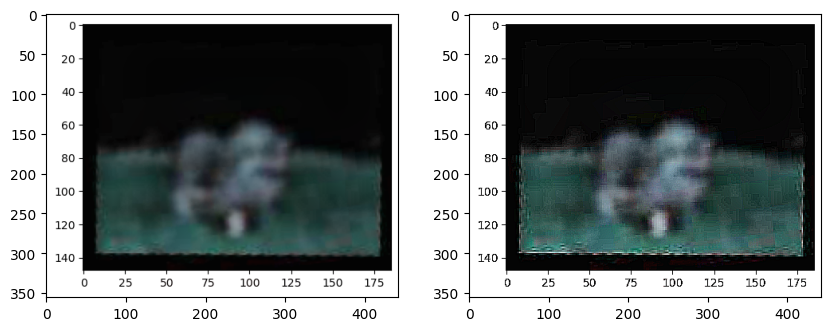

True

In [20]:
kernel1 = np.asarray([[-1, -1, -1], [-0.9, 9.1, -1], [-1, -1, -1]])
filtered_image = cv.filter2D(rgb_result_image, -1, kernel1)

gs = plt.GridSpec(1, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(rgb_result_image)
plt.subplot(gs[1])
plt.imshow(filtered_image)

plt.show()
cv.imwrite("result_image.jpg", filtered_image)
